In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv("/content/FeatureEnggData.csv")

In [ ]:
df


,ID,Name,Age,Salary,Department
0,151,Alice,NaN,55000.0,IT
1,192,Eve,NaN,65000.0,HR
2,114,Ian,22.0,60000.0,HR
3,171,Frank,NaN,70000.0,Marketing
4,160,Charlie,30.0,60000.0,HR
...,...,...,...,...,...
5095,181,Alice,30.0,70000.0,HR
5096,155,Alice,22.0,65000.0,HR
5097,183,Eve,25.0,50000.0,Finance
5098,136,Frank,30.0,NaN,Marketing


In [ ]:
df.head()

,ID,Name,Age,Salary,Department
0,151,Alice,NaN,55000.0,IT
1,192,Eve,NaN,65000.0,HR
2,114,Ian,22.0,60000.0,HR
3,171,Frank,NaN,70000.0,Marketing
4,160,Charlie,30.0,60000.0,HR


In [79]:
df.tail()

,ID,Name,Age,Salary,Department,Age_Group
4994,135,6,0.75,0.50,1,0
4996,157,3,0.75,0.75,2,0
4997,138,9,0.75,1.00,1,0
4998,179,6,1.00,0.50,2,0
4999,196,7,1.00,0.00,3,0


In [ ]:
df.describe()

,ID,Age,Salary
count,5100.000000,4061.000000,4595.000000
mean,148.833922,26.312731,59973.884657
std,28.980982,3.041617,6968.691508
min,100.000000,22.000000,50000.000000
25%,124.000000,25.000000,55000.000000
50%,148.000000,28.000000,60000.000000
75%,174.000000,30.000000,65000.000000
max,199.000000,30.000000,70000.000000


In [ ]:
df.isnull().sum()

,0
ID,0
Name,0
Age,1039
Salary,505
Department,524


In [ ]:
df.dtypes

,0
ID,int64
Name,object
Age,float64
Salary,float64
Department,object


In [ ]:
duplicate_count=df.duplicated().sum()
duplicate_count

186

In [ ]:
summary=df.describe()
summary

,ID,Age,Salary
count,5100.000000,4061.000000,4595.000000
mean,148.833922,26.312731,59973.884657
std,28.980982,3.041617,6968.691508
min,100.000000,22.000000,50000.000000
25%,124.000000,25.000000,55000.000000
50%,148.000000,28.000000,60000.000000
75%,174.000000,30.000000,65000.000000
max,199.000000,30.000000,70000.000000


In [ ]:
df = df.drop_duplicates()
df

,ID,Name,Age,Salary,Department
0,151,Alice,NaN,55000.0,IT
1,192,Eve,NaN,65000.0,HR
2,114,Ian,22.0,60000.0,HR
3,171,Frank,NaN,70000.0,Marketing
4,160,Charlie,30.0,60000.0,HR
...,...,...,...,...,...
4995,148,Charlie,NaN,60000.0,IT
4996,157,David,NaN,65000.0,IT
4997,138,Jack,NaN,70000.0,NaN
4998,179,Grace,30.0,60000.0,IT


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-57-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-57-63d4fb902a4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df['Salary'].fillna(df['Salary'].median(), inplace=True)

<ipython-input-58-6eacf89031ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(), inplace=True)
<ipython-input-58-6eacf89031ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'].fillna(df['Salary'].median(), inplace=True)


In [ ]:
df['Department'].fillna(df['Department'].mode()[0], inplace=True)

<ipython-input-59-9e4949c63069>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna(df['Department'].mode()[0], inplace=True)
<ipython-input-59-9e4949c63069>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Department'].fillna(df['Department'].mode()[0], inplace=True)


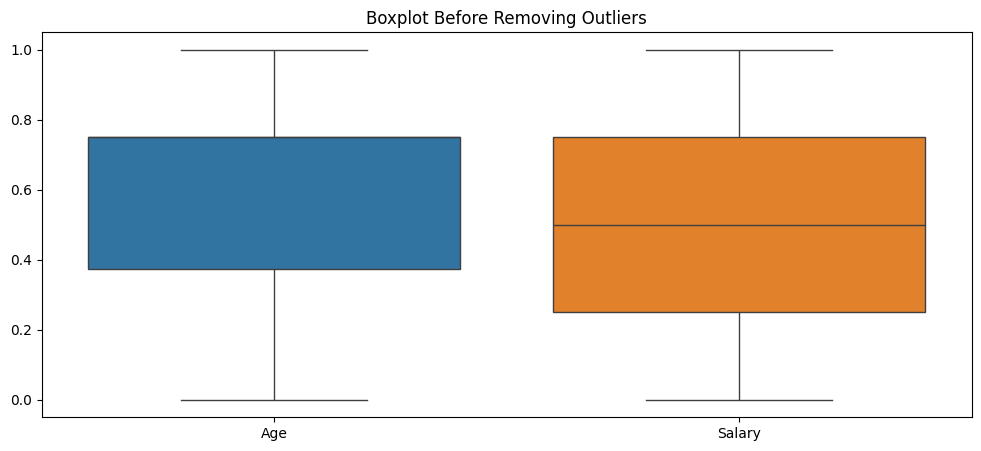

In [80]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['Age', 'Salary']])
plt.title("Boxplot Before Removing Outliers")
plt.show()

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, "Age")
df = remove_outliers(df, "Salary")

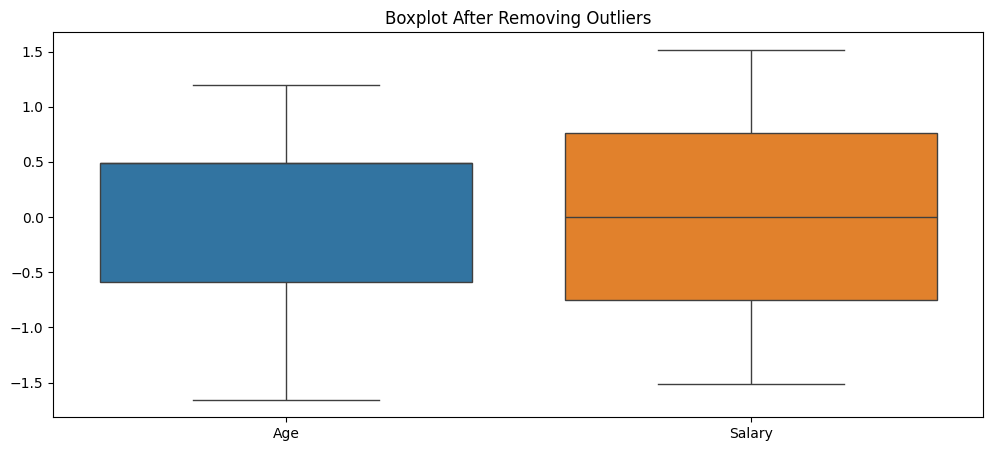

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['Age', 'Salary']])
plt.title("Boxplot After Removing Outliers")
plt.show()

In [83]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
department_encoded = ohe.fit_transform(df[['Department']])
department_encoded_df = pd.DataFrame(department_encoded, columns=ohe.get_feature_names_out(['Department']))
df = pd.concat([df, department_encoded_df], axis=1)
df.drop(columns=['Department'], inplace=True)

In [ ]:
scaler = MinMaxScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

In [84]:
df['Age_Group'] = df['Age_Group'].astype(str)

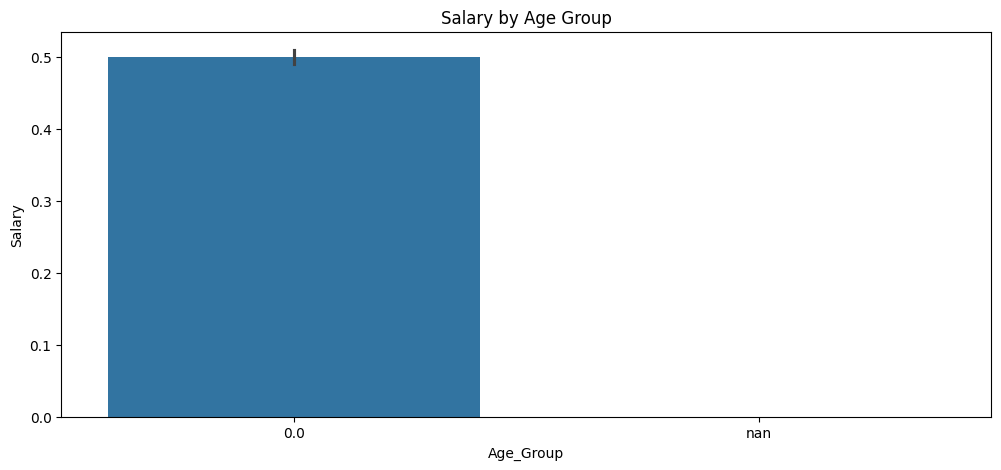

In [91]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df['Age_Group'], y=df['Salary'])
plt.title("Salary by Age Group")
plt.show()

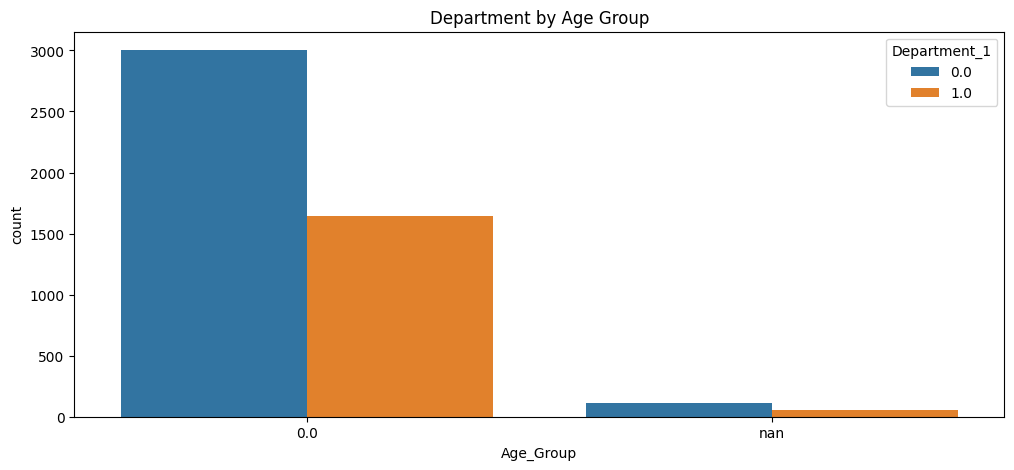

In [92]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Age_Group', hue=department_encoded_df.columns[0], data=df)
plt.title("Department by Age Group")
plt.show()

In [93]:
df['Salary_Skewness'] = df['Salary'].skew()
print(f"Skewness in Salary: {df['Salary_Skewness'].iloc[0]}")

Skewness in Salary: -0.011276848234441179


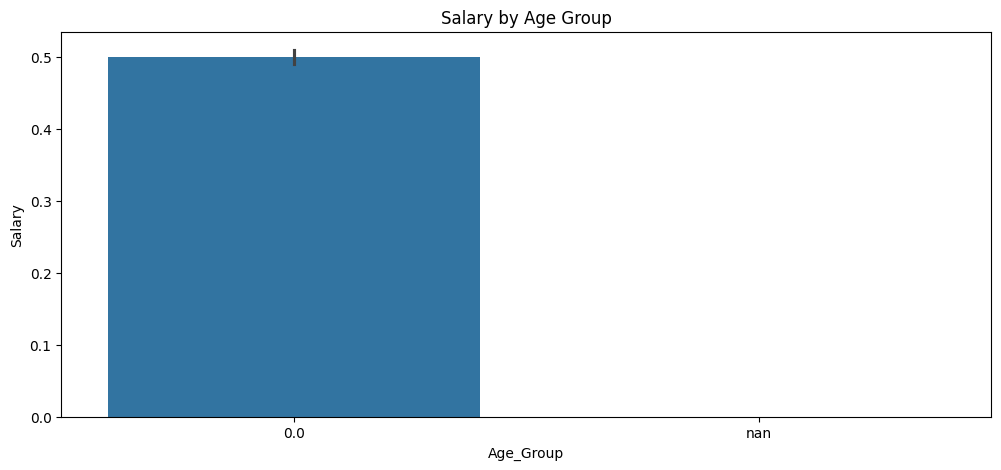

In [94]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df['Age_Group'], y=df['Salary'])
plt.title("Salary by Age Group")
plt.show()

In [95]:
if abs(df['Salary_Skewness'].iloc[0]) > 1:
    df['Salary'] = np.log1p(df['Salary'])
    print("Applied log transformation to Salary.")

In [96]:
df.dtypes

,0
ID,float64
Name,float64
Age,float64
Salary,float64
Age_Group,object
Department_1,float64
Department_2,float64
Department_3,float64
Salary_Skewness,float64


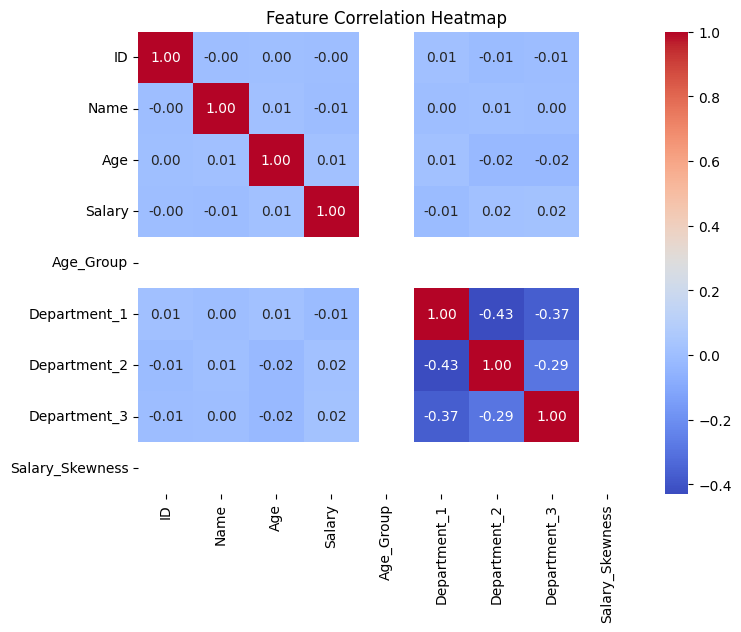

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

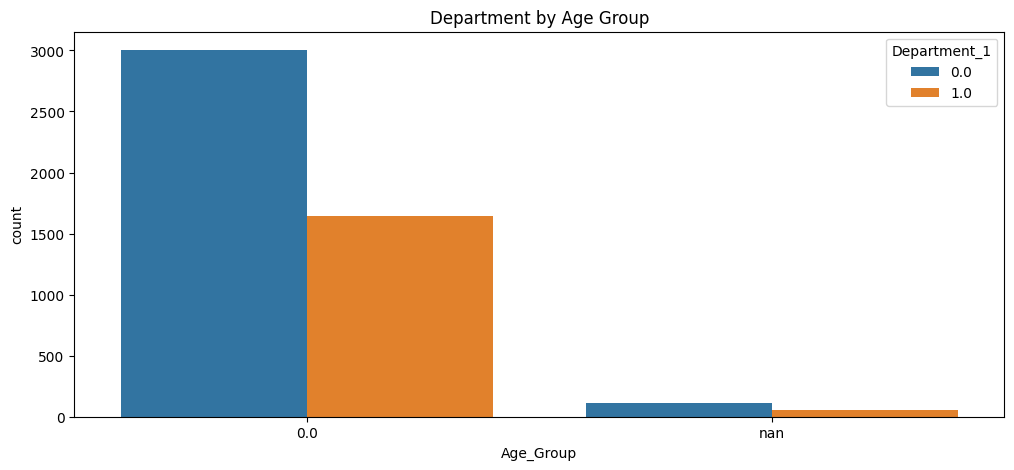

In [98]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Age_Group', hue=department_encoded_df.columns[0], data=df)
plt.title("Department by Age Group")
plt.show()

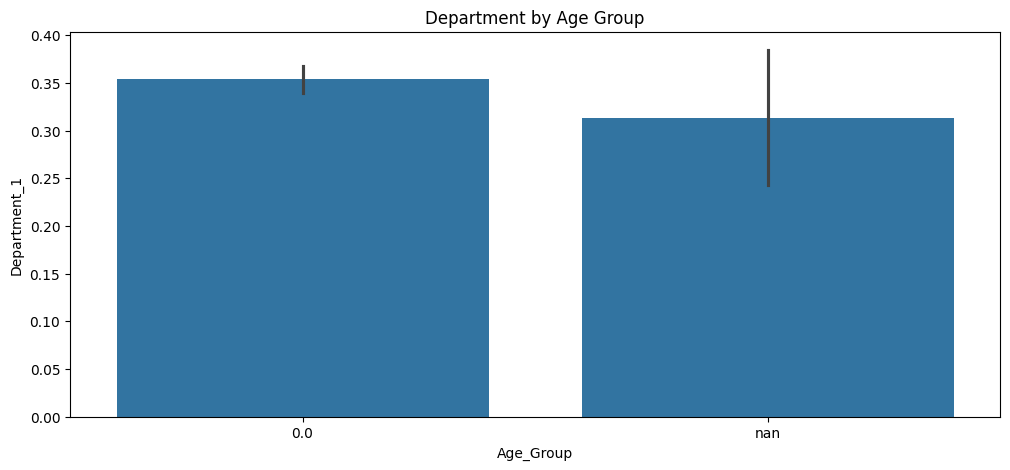

In [99]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df['Age_Group'], y=df['Department_1'])
plt.title("Department by Age Group")
plt.show()